<a href="https://colab.research.google.com/github/codeslayed/irisdataset/blob/main/Linear_Regression_on_Simple_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate a synthetic dataset
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1: Hours Studied
X2 = np.random.rand(100) * 100  # Feature 2: Attendance Percentage
noise = np.random.randn(100) * 10  # Noise

# Target variable: Exam Score influenced by both features
y = 50 + 5 * X1 + 0.5 * X2 + noise

# Combine features into a DataFrame
df = pd.DataFrame({'Hours_Studied': X1, 'Attendance': X2, 'Exam_Score': y})

In [3]:
# Define features and target variable
X = df[['Hours_Studied', 'Attendance']]  # Multiple features
y = df['Exam_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')

Cross-Validation Scores: [0.63538472 0.8718053  0.8521346  0.64920219 0.82155409]
Mean CV Score: 0.77


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [8]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 66.64
R-squared: 0.88


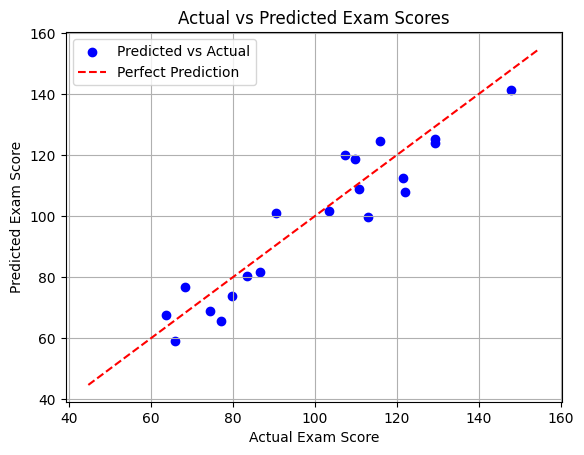

In [9]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Exam Scores')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.grid()
plt.show()